<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">Regression</div></h1>

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

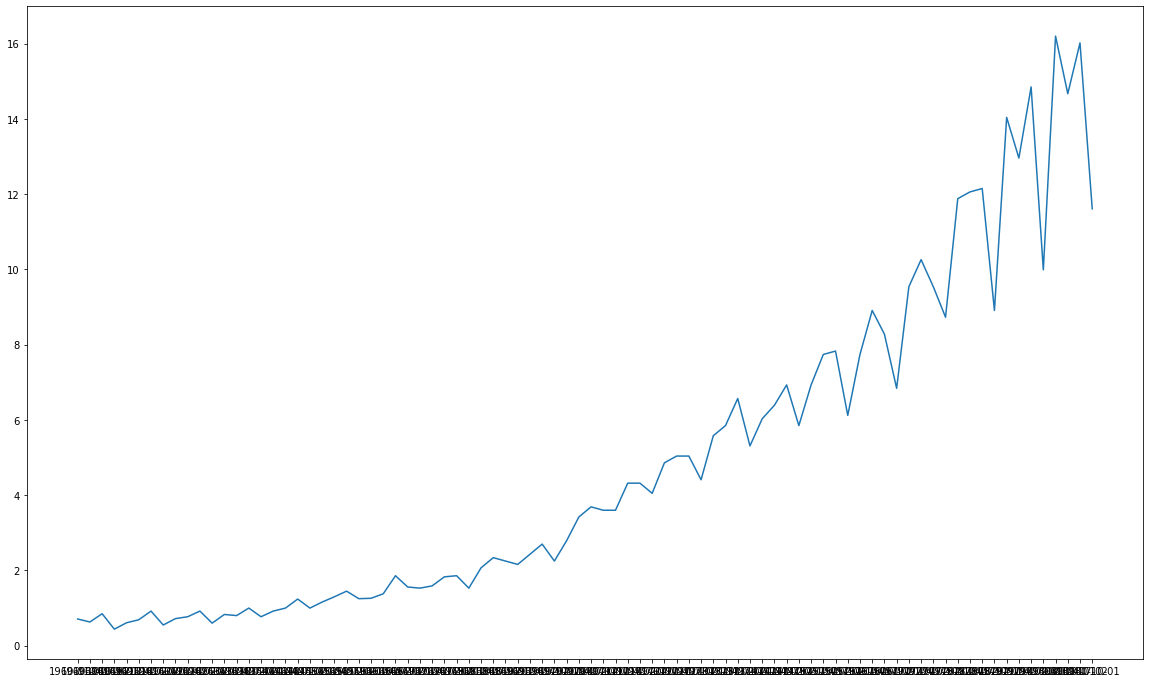

In [2]:
data = pd.read_csv('../__data/jshare.csv')
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.show()

### fit model
##### (Data_File, order=(dim_last_check, diff(stationary time series), dim_last_noise_check), seasonal_order=(order_parm, Repeat_cycle))
##### (Data_File, order=(p, d, q), seasonal_order=((p, d, q, s))

In [3]:
model = SARIMAX(data['data'], order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))
res = model.fit()
# print(res.summary())     #AIC ---> lower ---> better model
res.aic

C:\Users\Mohammad KH\.conda\envs\deep_\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


100.01313255756024

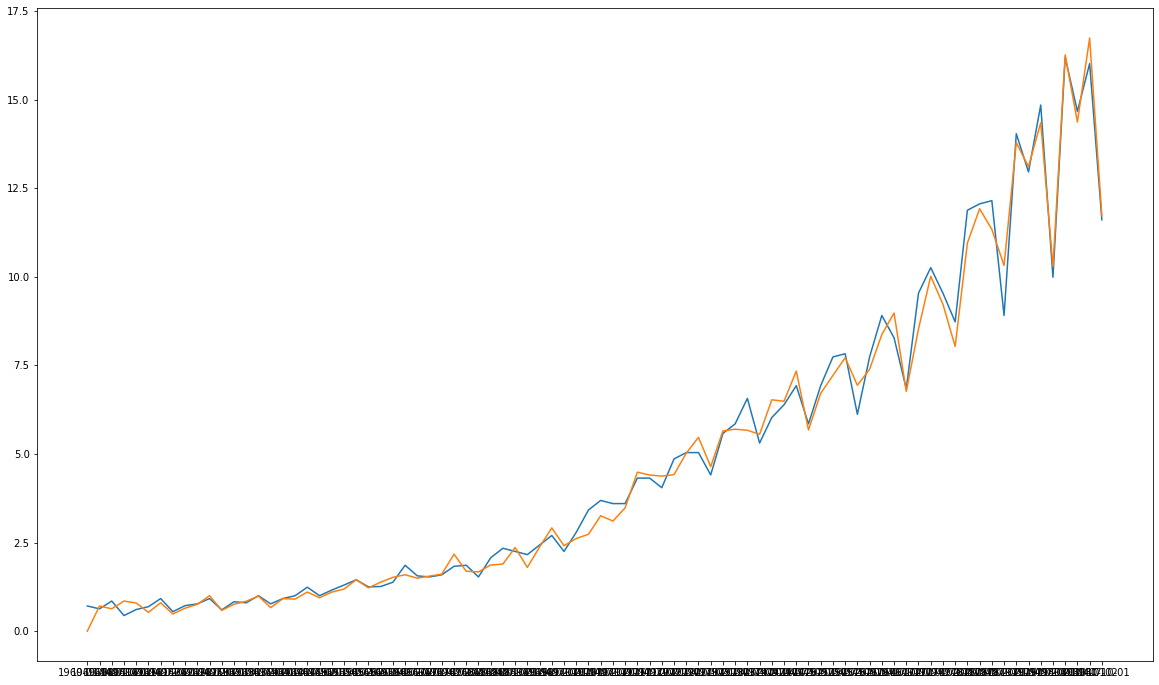

In [4]:
data['sarimax'] = res.fittedvalues
plt.figure(figsize=(20, 12))
plt.plot(data['date'], data['data'])
plt.plot(data['date'], data['sarimax'])
plt.show()

### futuer

C:\Users\MOHAMM~1\AppData\Local\Temp/ipykernel_20920/1864472465.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = data['sarimax'].append(forecast)


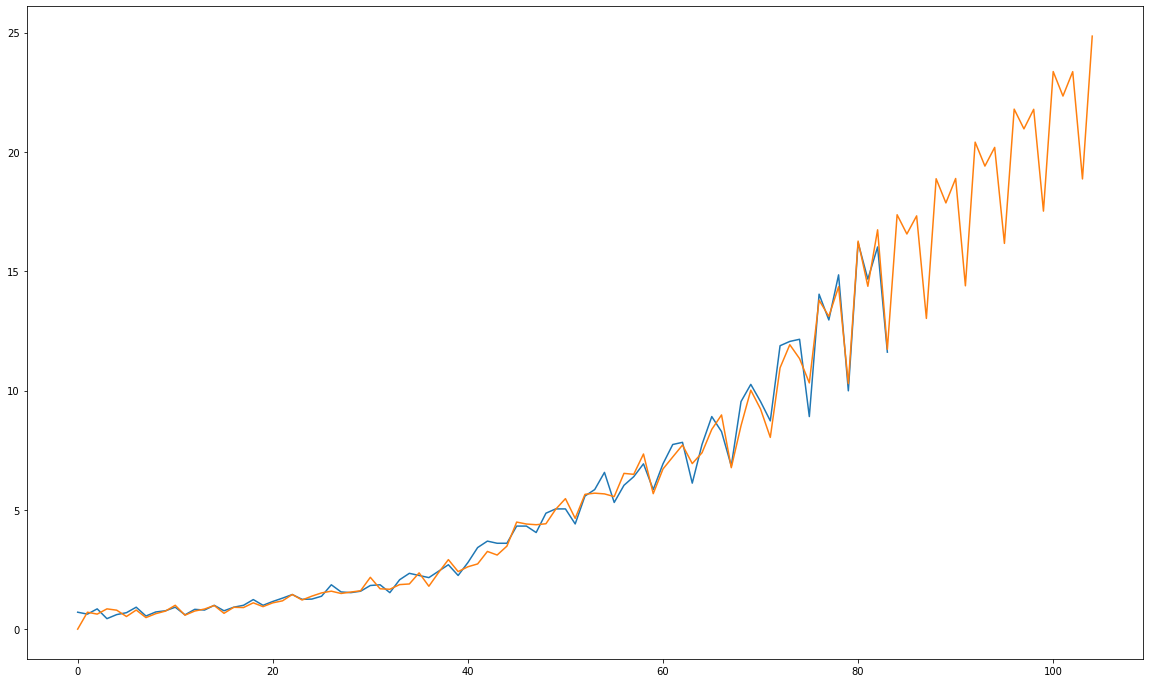

In [5]:
forecast = res.predict(start=len(data), end=len(data) + 20)
forecast = data['sarimax'].append(forecast)

plt.figure(figsize=(20, 12))
plt.plot(data['data'])
plt.plot(forecast)
plt.show()

### fune tune parm for model

In [6]:
from itertools import product
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
ps = range(0, 3, 1)
ds = 1
qs = range(0, 3, 1)
s = 4
params = list(product(p, q, ps, qs))
print(params[:3] ,' ......')

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2)]  ......


In [ ]:
results = []
for order in params:
    try:
        model = SARIMAX(data['data'], order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        results.append([order, res.aic])
    except:
        continue

In [8]:
r = pd.DataFrame(results, columns=['order', 'AIC']).sort_values(by='AIC', ascending=True).reset_index().drop(columns=['index'])
r.head()

,order,AIC
0,"(1, 2, 0, 0)",96.135318
1,"(2, 1, 0, 0)",96.634139
2,"(2, 2, 0, 0)",97.032216
3,"(1, 2, 0, 1)",97.892411
4,"(1, 2, 1, 0)",97.901889


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>Regression</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>